In [37]:
import os
import sys
import shutil
import dotenv
from   dotenv import find_dotenv, load_dotenv
import matplotlib
load_dotenv(find_dotenv())
PATH_P     = os.environ['PATH_P']
os.chdir(PATH_P)
sys.path.insert(0, PATH_P)
import seaborn as sns
import pandas as pd
from src.dst.outputhandler.pickle import tic,toc,pickle_save_,pickle_load
from src.dst.plots.plots import plotting_tool,retrieve_data
from src.visualization.vis_LSTM_p.main import main_visualize

import matplotlib.pyplot as plt

## bayes opt

# DEEP2

lr           : 0.001267345303142497
time_dim     : 20
encoder      : [240, 443]
decoder      : [470]
vector       : 240
AUC_v        : 0.7629029054590853


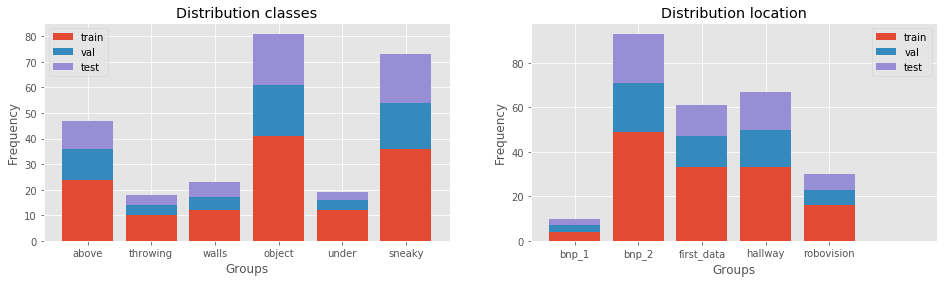

In [38]:
path                                 =  './models/AFE/learning_curve/'
RD                                    = retrieve_data()
data,dict_,path_best,hist_nd,hist_d   = RD.get_best(path)


dict_['AUC_v']                        = data['AUC_v']
RD.print_dict(dict_)
BO_vis                                = plotting_tool(dict_)
BO_vis.plot_dist(data)


Text(0,0.5,'loss')

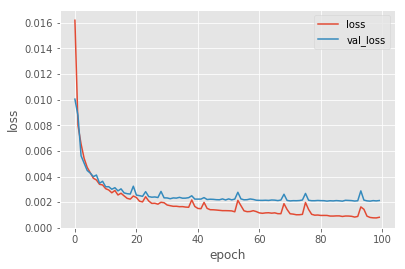

In [39]:
plt.plot(hist_nd['loss'],label = 'loss')
plt.plot(hist_nd['val_loss'],label = 'val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

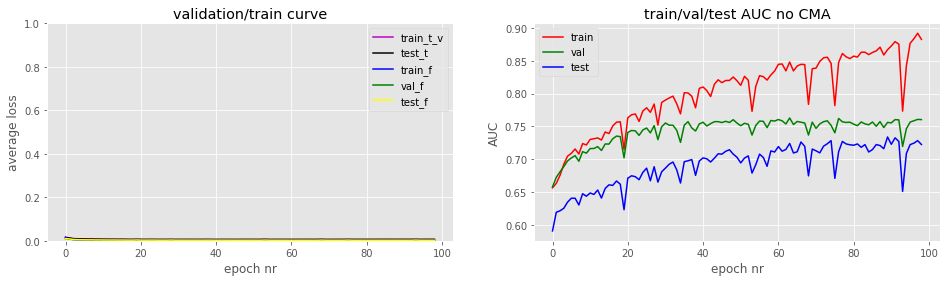

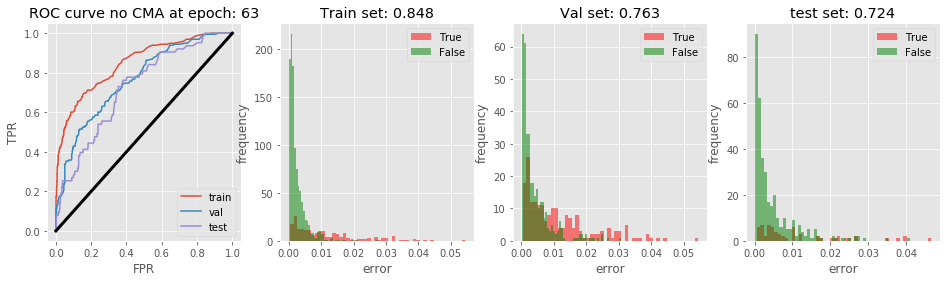

In [40]:
BO_vis.save_plots_no_cma(data)

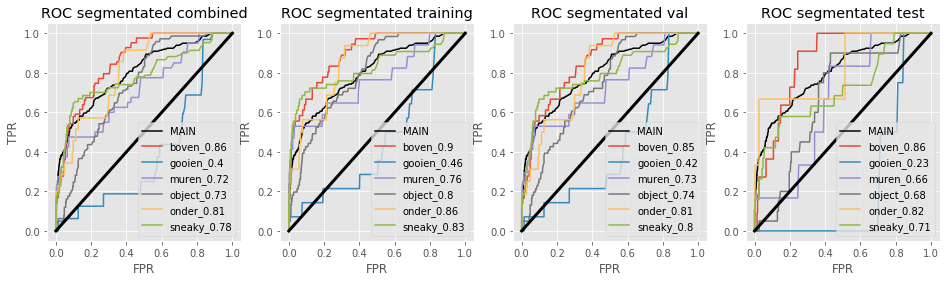

In [28]:
data_s = BO_vis._get_data_segmented(data,'segmentation')
BO_vis.save_ROC_segment(data_s,'segmentation')

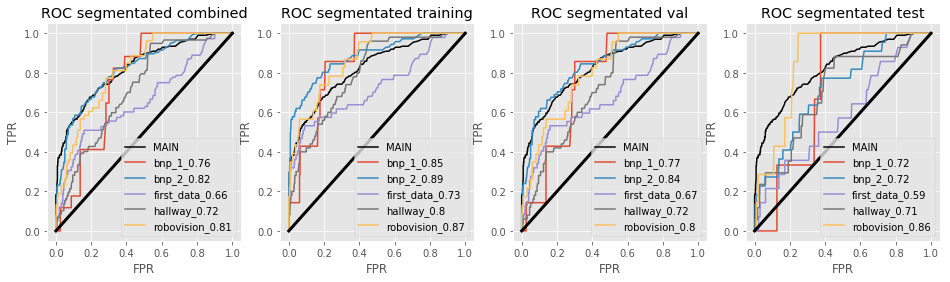

In [19]:

data_s = BO_vis._get_data_segmented(data,'location')
BO_vis.save_ROC_segment(data_s,'location')

<Figure size 1152x288 with 0 Axes>

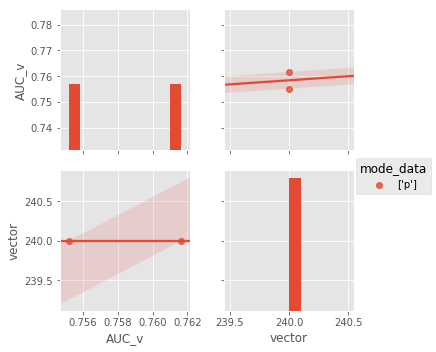

In [20]:
df = RD.get_scatter_data(path,['AUC_v','vector','mode_data'])
fig = plt.figure(figsize=(16,4))
g = sns.pairplot(df, diag_kind="hist",kind = 'reg' , hue ='mode_data'  )
# plt.savefig('./bayesopt.png')